In [1]:
#les instructions d'importation 

import  sys 
assert  sys . version_info [ 0 ] == 3 
assert  sys . version_info [ 1 ]  >=  5
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to /home/dabone/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
def read_corpus(category="crude"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

In [3]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

  'prime', 'minister', 'andreas', 'papandreou', 'today', 'for', 'the', 'greek', 'reply', 'to', 'a',
  'message', 'sent', 'last', 'week', 'by', 'turkish', 'prime', 'minister', 'turgut', 'ozal', '.',
  'the', 'contents', 'of', 'the', 'message', 'were', 'not', 'disclosed', '.', '<END>']]


In [4]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
   
    num_corpus_words = -1
   
    # ------------------
    # Write your implementation here.
    for corps in corpus:
        for i in corps :
            corpus_words.append(i)
        
        
    corpus_words = sorted(list(set(corpus_words)))
    num_corpus_words = len(corpus_words)
    # ------------------

    return corpus_words, num_corpus_words

In [5]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2Ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, num_words = distinct_words(corpus)
    M = None
    word2Ind = {}
    
    # ------------------
    # Write your implementation here.
    word2Ind = dict(zip(words, range(num_words)))   
    M = np.zeros([num_words,num_words]) # n i the count of all words
    for sentance in corpus:
        for index,word in enumerate(sentance):
            word_index = word2Ind[word]
            for j in range(max(index-window_size,0),min(index+window_size,len(sentance)-1)):
               
                if index != j: 
                    
                    
                   
                    sentance_index = sentance[j]
                    
                    M[word_index][word2Ind[sentance_index ]]+= 1
                                  
                    M[word2Ind[sentance_index]][word_index]+= 1
                    
                    
                    
   
       

    
    # ------------------

    return M, word2Ind

In [6]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array( 
    [[0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,],
     [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,]]
)
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
word2Ind_ans = dict(zip(ans_test_corpus_words, range(len(ans_test_corpus_words))))

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)


--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [7]:
 from sklearn.decomposition import TruncatedSVD

In [8]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
        # ------------------
        # Write your implementation here.
    svd = TruncatedSVD(n_components=k, n_iter=10, random_state=50)
    M_reduced = svd.fit_transform(M)
    print(M_reduced)

   
        # ------------------

    print("Done.")
    return M_reduced

In [9]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
[[ 6.54802087e-01  7.83221122e-01]
 [ 5.20200324e-01  3.58639433e-16]
 [ 7.05647176e-01 -4.84057274e-01]
 [ 7.05647176e-01  4.84057274e-01]
 [ 1.02780472e+00  5.12662647e-16]
 [ 6.54802087e-01 -7.83221122e-01]
 [ 3.82258491e-01 -6.56224003e-01]
 [ 3.82258491e-01  6.56224003e-01]
 [ 1.39420808e+00  1.06179274e+00]
 [ 1.39420808e+00 -1.06179274e+00]]
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [10]:
import numpy as np
import matplotlib.pyplot as plt 

In [11]:
def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    # Write your implementation here.
    for  word in words :
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x,y , marker = "X" , color ='blue' )
        plt.text(x, y, word)
      
        
        
        


    # ------------------

--------------------------------------------------------------------------------
Outputted Plot:
--------------------------------------------------------------------------------


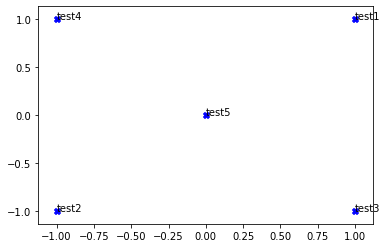

In [12]:
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

print ("-" * 80)

Running Truncated SVD over 8185 words...
[[ 1.32159347e+03 -2.38438297e+02]
 [ 2.31179855e+00 -2.10022597e-01]
 [ 5.13376288e-01  1.75595501e-01]
 ...
 [ 1.82417675e+00 -5.40674244e-01]
 [ 1.16069534e+00 -3.80168134e-01]
 [ 4.54915562e+00  4.49068692e-01]]
Done.


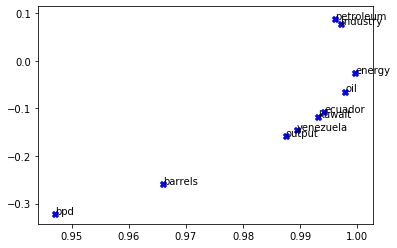

In [13]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
reuters_corpus = read_corpus()
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']

plot_embeddings(M_normalized, word2Ind_co_occurrence, words)

In [14]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(wv_from_bin.vocab.keys()))
    return wv_from_bin

In [15]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take several minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

Loaded vocab size 400000


In [16]:
def get_matrix_of_vectors(wv_from_bin, required_words=['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    """ Put the GloVe vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.vocab.keys())
    print("Shuffling words ...")
    random.seed(224)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.word_vec(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

In [17]:
# -----------------------------------------------------------------
# Run Cell to Reduce 200-Dimensional Word Embeddings to k Dimensions
# Note: This should be quick to run
# -----------------------------------------------------------------
M, word2Ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10010 words...
[[-1.172124   -0.45706332]
 [ 0.10721815 -1.0444939 ]
 [-0.6618926  -0.98741776]
 ...
 [ 2.1809514  -1.534431  ]
 [ 1.7537284  -0.28660133]
 [ 1.8404899  -0.23972875]]
Done.


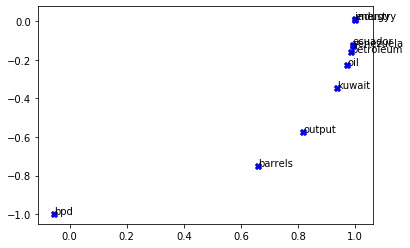

In [18]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_reduced_normalized, word2Ind, words)

In [25]:
wv_from_bin.most_similar(words)



[('exporting', 0.7158160209655762),
 ('opec', 0.7087447643280029),
 ('crude', 0.7055649757385254),
 ('gas', 0.6706339120864868),
 ('exports', 0.6685571670532227),
 ('export', 0.6312612891197205),
 ('production', 0.6309671401977539),
 ('refining', 0.6038604378700256),
 ('gasoline', 0.596082329750061),
 ('imports', 0.5939213037490845)]

In [26]:
print('******')
wv_from_bin.distance("manger","consommer")


******


KeyError: "word 'consommer' not in vocabulary"

In [30]:
w1 = "eat"
w2 = "use"
synonime_w1_w2 = wv_from_bin.distance(w1,w2)
print("{} , {} : {}". format(w1 , w2 , synonime_w1_w2))


eat , use : 0.6588798463344574


In [31]:
w1 = "eat"
w2 = "fast"
synonime_w1_w2 = wv_from_bin.distance(w1,w2)
print("{} , {} : {}". format(w1 , w2 , synonime_w1_w2))

eat , fast : 0.6150794327259064


In [33]:
Parcequ ils exitents plus synonimes contrairement au antonymes qui sont peu et spécifiques à un mot

SyntaxError: invalid syntax (<ipython-input-33-a31dc25ade9b>, line 1)

In [34]:
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052172660828),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]


In [35]:
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'teacher'], negative=['man']))

[('student', 0.6261826753616333),
 ('teachers', 0.626014232635498),
 ('schoolteacher', 0.6252343654632568),
 ('educator', 0.609130859375),
 ('mother', 0.596482515335083),
 ('teaching', 0.5746136903762817),
 ('librarian', 0.5692472457885742),
 ('daughter', 0.5586754083633423),
 ('nurse', 0.5579686164855957),
 ('school', 0.5525771379470825)]


In [37]:
pprint.pprint(wv_from_bin.most_similar(positive=['car', 'teacher'], negative=['license']))

[('student', 0.5094761252403259),
 ('mother', 0.49679040908813477),
 ('young', 0.48584112524986267),
 ('woman', 0.479267418384552),
 ('school', 0.4729333221912384),
 ('friend', 0.4701133966445923),
 ('daughter', 0.4685974717140198),
 ('teachers', 0.4674891233444214),
 ('remembers', 0.46574267745018005),
 ('remembered', 0.4639805555343628)]


In [39]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'worker'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'worker'], negative=['woman']))

[('employee', 0.6375863552093506),
 ('workers', 0.6068919897079468),
 ('nurse', 0.5837947130203247),
 ('pregnant', 0.5363885760307312),
 ('mother', 0.5321309566497803),
 ('employer', 0.5127025842666626),
 ('teacher', 0.5099577307701111),
 ('child', 0.5096741914749146),
 ('homemaker', 0.5019455552101135),
 ('nurses', 0.4970571994781494)]

[('workers', 0.611325740814209),
 ('employee', 0.5983108878135681),
 ('working', 0.5615329742431641),
 ('laborer', 0.5442320108413696),
 ('unemployed', 0.5368517637252808),
 ('job', 0.5278826951980591),
 ('work', 0.5223963260650635),
 ('mechanic', 0.5088937282562256),
 ('worked', 0.5054520964622498),
 ('factory', 0.4940453767776489)]


In [43]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['iran', 'muslim'], negative=['city']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['city', 'muslim'], negative=['iran']))

[('islamic', 0.6383787393569946),
 ('iranian', 0.5968962907791138),
 ('muslims', 0.5581181645393372),
 ('iranians', 0.5542980432510376),
 ('moslem', 0.5503737330436707),
 ('extremists', 0.5357257127761841),
 ('syria', 0.5236482620239258),
 ('pakistan', 0.5205038785934448),
 ('khatami', 0.5203977823257446),
 ('khamenei', 0.5195896029472351)]

[('cities', 0.5874712467193604),
 ('town', 0.5698155164718628),
 ('neighborhoods', 0.5307896137237549),
 ('residents', 0.5280705690383911),
 ('downtown', 0.5137006640434265),
 ('muslims', 0.5129067897796631),
 ('area', 0.5105980038642883),
 ('local', 0.5098457932472229),
 ('urban', 0.508838415145874),
 ('neighborhood', 0.5074199438095093)]
